In [1]:
import pandas as pd

In [2]:
matlab plotting library

SyntaxError: invalid syntax (275533130.py, line 1)

In [123]:
nyc=pd.read_csv('/Users/or.bason/Desktop/Python_course/AB_NYC_2019.csv')

In [124]:
nyc=nyc[['name','host_name','neighbourhood_group','neighbourhood','reviews_per_month',\
     'room_type','price','minimum_nights','number_of_reviews','last_review','calculated_host_listings_count','availability_365']]


In [7]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   name                            48879 non-null  object
 1   host_name                       48874 non-null  object
 2   neighbourhood_group             48895 non-null  object
 3   neighbourhood                   48895 non-null  object
 4   room_type                       48895 non-null  object
 5   price                           48895 non-null  int64 
 6   minimum_nights                  48895 non-null  int64 
 7   number_of_reviews               48895 non-null  int64 
 8   last_review                     38843 non-null  object
 9   calculated_host_listings_count  48895 non-null  int64 
 10  availability_365                48895 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 4.1+ MB


<AxesSubplot:xlabel='neighbourhood_group'>

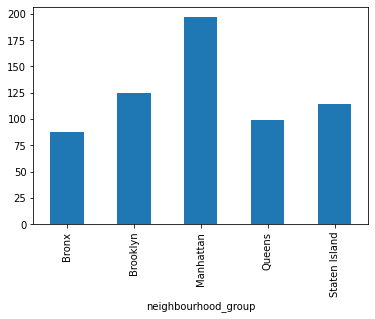

In [8]:
nyc.groupby('neighbourhood_group')['price'].mean().plot(kind='bar')   // #BAR Chaart With Group BY

<AxesSubplot:xlabel='neighbourhood_group'>

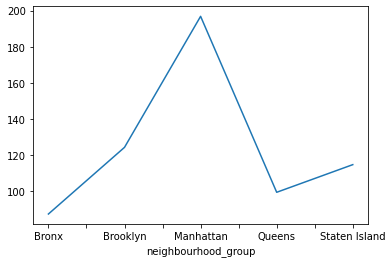

In [9]:
nyc.groupby('neighbourhood_group')['price'].mean().plot()    #// without the kind it's would be a line

In [10]:
mean_price_group=nyc.groupby('neighbourhood_group')['price'].mean()

<AxesSubplot:xlabel='neighbourhood_group'>

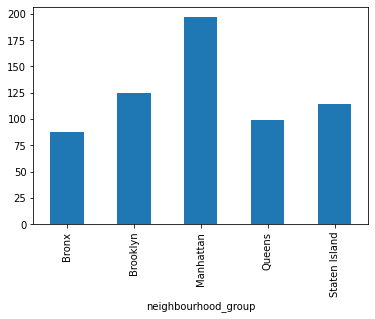

In [12]:
mean_price_group.plot(kind='bar') # Another Path to implement - With variable

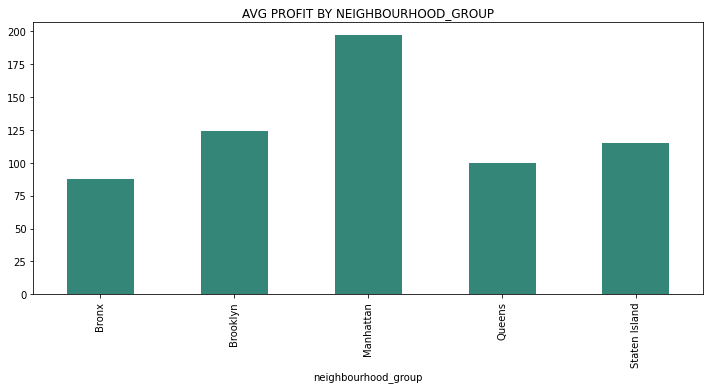

In [13]:
mean_price_group.plot.bar(figsize=(12,5)
                          ,title='AVG PROFIT BY NEIGHBOURHOOD_GROUP'
                          ,color='#348678');

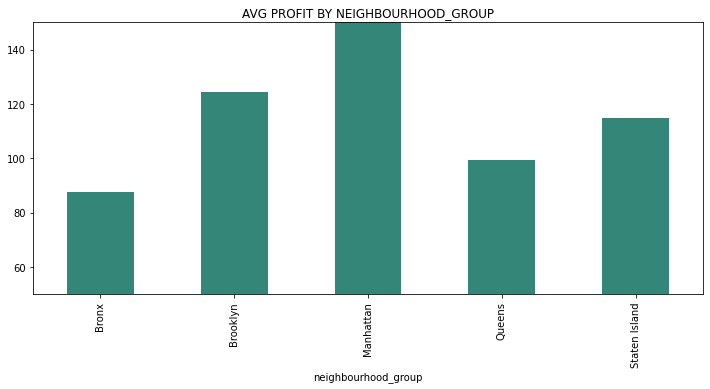

In [14]:
mean_price_group.plot.bar(figsize=(12,5)
                          ,title='AVG PROFIT BY NEIGHBOURHOOD_GROUP'
                          ,color='#348678'
                         ,ylim=(50,150));    #change tha  YLimit

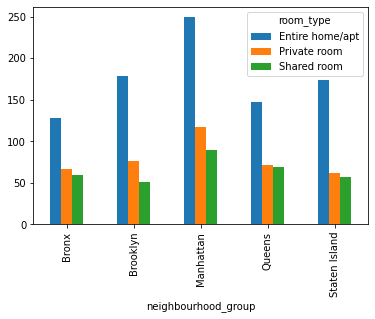

In [21]:
nyc.pivot_table(index='neighbourhood_group',
                columns='room_type',
                values='price').plot.bar();

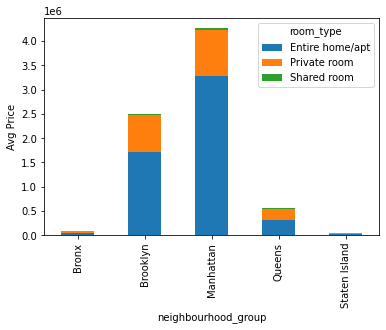

In [27]:
nyc.pivot_table(index='neighbourhood_group',
                columns='room_type',
                values='price',
               aggfunc='sum').plot.bar(ylabel='Avg Price',stacked=True);

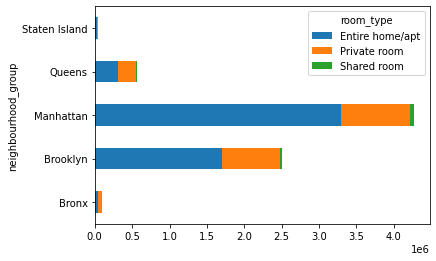

In [29]:
nyc.pivot_table(index='neighbourhood_group',
                columns='room_type',
                values='price',
               aggfunc='sum').plot(kind = 'barh' ,ylabel='Avg Price',stacked=True);

In [34]:
nyc.pivot_table(index='neighbourhood_group',
                columns='room_type',
                values='price',
               aggfunc='count',
                margins=True)

room_type,Entire home/apt,Private room,Shared room,All
neighbourhood_group,,,,
Bronx,379,652,60,1091
Brooklyn,9559,10132,413,20104
Manhattan,13199,7982,480,21661
Queens,2096,3372,198,5666
Staten Island,176,188,9,373
All,25409,22326,1160,48895


In [50]:
prices=nyc.pivot_table(index='neighbourhood_group',
                columns='room_type',
                values='price',
               aggfunc='count')

prices.div(prices.sum(axis=1),axis=0)   #This is the Pivot table with Distribution in Table

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,0.347388,0.597617,0.054995
Brooklyn,0.475478,0.503979,0.020543
Manhattan,0.609344,0.368496,0.022160
Queens,0.369926,0.595129,0.034945
Staten Island,0.471850,0.504021,0.024129


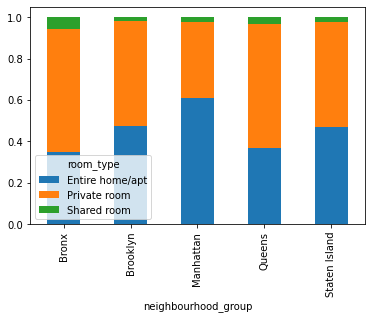

In [43]:
prices=nyc.pivot_table(index='neighbourhood_group',
                columns='room_type',
                values='price',
               aggfunc='count')

prices.div(prices.sum(axis=1),axis=0).plot.bar(stacked=True);  #Distribution in %

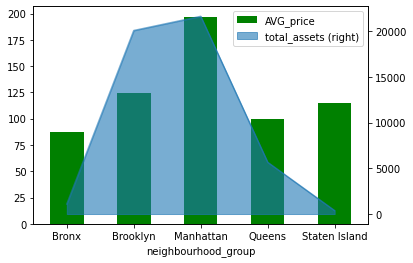

In [56]:
df=nyc.groupby('neighbourhood_group').agg(AVG_price=('price','mean'),
                                          total_assets=('name','count'))
df['AVG_price'].plot.bar(legend=True, color='green');
df['total_assets'].plot.area(secondary_y=True,legend=True,alpha=0.6);
                                         


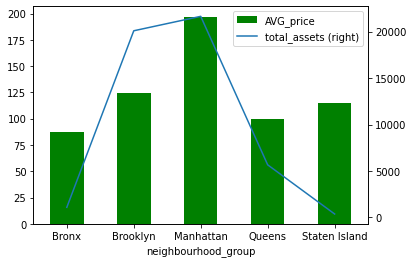

In [63]:
df=nyc.groupby('neighbourhood_group').agg(AVG_price=('price','mean'),
                                          total_assets=('name','count'))
df['AVG_price'].plot.bar(legend=True, color='green');
df['total_assets'].plot.line(secondary_y=True,legend=True);
                                         


# Histograms

In [69]:
nyc.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'calculated_host_listings_count', 'availability_365'],
      dtype='object')

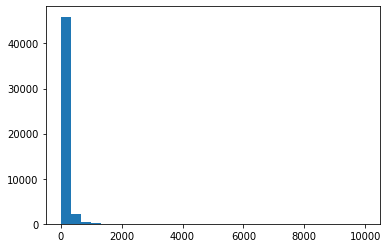

In [72]:
nyc['price'].hist(bins=30,grid=False);

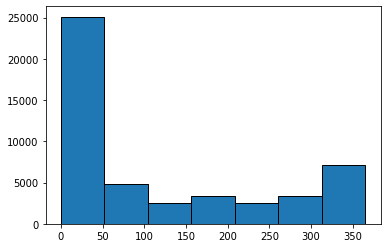

In [76]:
nyc['availability_365'].hist(bins=7,grid=False ,edgecolor='Black');

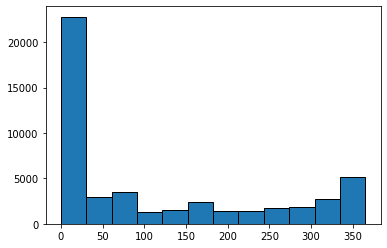

In [77]:
nyc['availability_365'].hist(bins=12,grid=False ,edgecolor='Black' );   #Bins is a quantity of columns

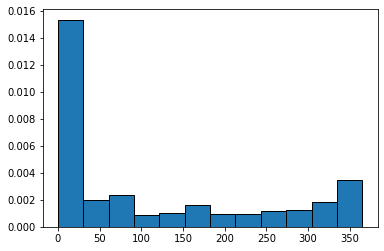

In [79]:
nyc['availability_365'].hist(bins=12,grid=False ,edgecolor='Black' , density=True );   #Density is the percent of

In [84]:
nyc['availability_365'].query('availability_365<=50').plot.hist(bins=12,grid=False ,edgecolor='Black' , density=True );

AttributeError: 'Series' object has no attribute 'query'

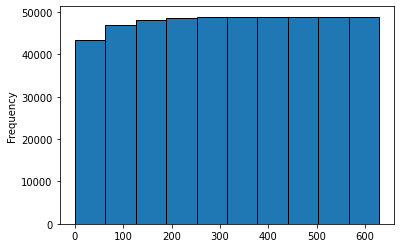

In [90]:
nyc['number_of_reviews'].plot.hist(edgecolor='Black',
                                cumulative=True);         #/cumulative

# defining a column as a time

In [111]:
nyc['last_review']=nyc['last_review'].astype('datetime64')

/var/folders/yb/7dy_hvvx5sx89j_j2dc4dp6w0000gp/T/ipykernel_42762/3548642652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc['last_review']=nyc['last_review'].astype('datetime64')


/var/folders/yb/7dy_hvvx5sx89j_j2dc4dp6w0000gp/T/ipykernel_42762/4133210621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc['last_review']=pd.to_datetime(nyc['last_review'])


# LINE

<AxesSubplot:xlabel='last_review'>

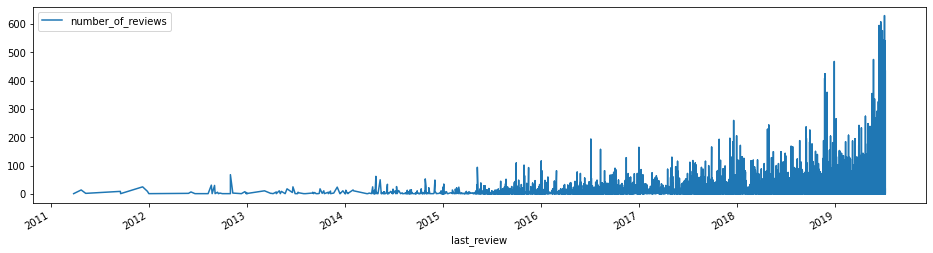

In [117]:
nyc[['last_review','number_of_reviews']].plot.line(x='last_review',y='number_of_reviews',figsize=(16,4))

<AxesSubplot:xlabel='last_review'>

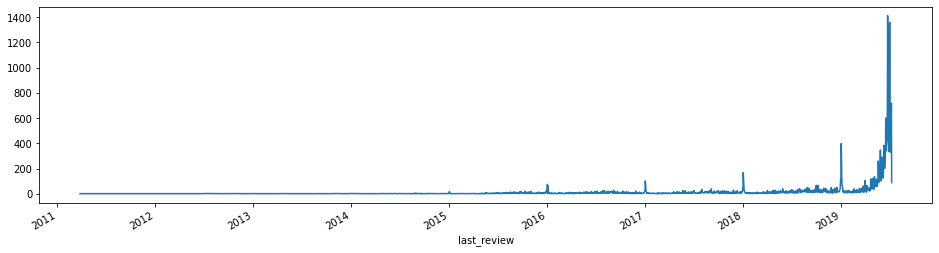

In [101]:
nyc.groupby('last_review').size().plot(figsize=(16,4))

In [ ]:
# Another Library = Plotly   || Streamlit is an automatic dashboard app developer

In [167]:
nyc

,name,host_name,neighbourhood_group,neighbourhood,reviews_per_month,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,0.21,Private room,149,1,9,2018-10-19,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,0.38,Entire home/apt,225,1,45,2019-05-21,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,NaN,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,4.64,Entire home/apt,89,1,270,2019-07-05,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,0.10,Entire home/apt,80,10,9,2018-11-19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,NaN,Private room,70,2,0,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,NaN,Private room,40,4,0,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,NaN,Entire home/apt,115,10,0,NaN,1,27
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,NaN,Shared room,55,1,0,NaN,6,2


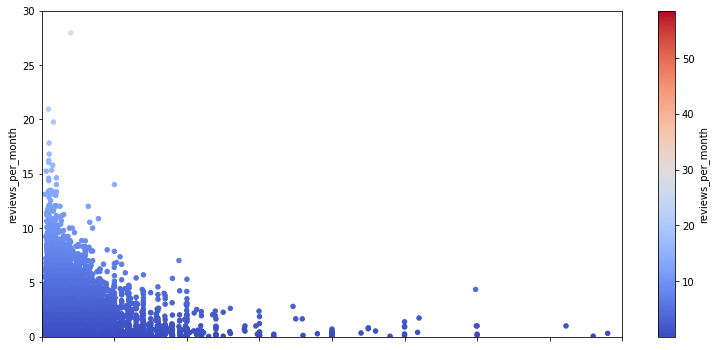

In [133]:
nyc.plot.scatter(x='price',
                 y='reviews_per_month',
                    xlim=(0,4000),
                     ylim=(0,30),
                      figsize=(13,6),
                     xlabel='Price',
                cmap='coolwarm',
               c='reviews_per_month' );

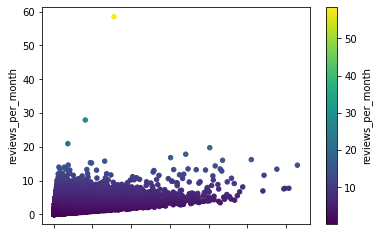

In [136]:
nyc.plot.scatter(x='number_of_reviews', y='reviews_per_month', c='reviews_per_month',cmap='viridis');

# Conditional Formating

In [171]:
rev=nyc.pivot_table(index=['neighbourhood_group','neighbourhood'] , columns='room_type', values='number_of_reviews')

In [141]:
rev.style.highlight_max()    #For every columss

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,30.678100,25.018405,7.200000
Brooklyn,27.945183,21.086952,14.026634
Manhattan,17.815516,26.202706,21.400000
Queens,28.933206,27.746441,13.863636
Staten Island,33.278409,30.159574,1.555556


In [ ]:
rev.style.highlight_max(axis=None)    #Axis=None - For all the Table 

In [147]:
rev.style.highlight_max(axis=1)    #For every Row

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,30.678100,25.018405,7.200000
Brooklyn,27.945183,21.086952,14.026634
Manhattan,17.815516,26.202706,21.400000
Queens,28.933206,27.746441,13.863636
Staten Island,33.278409,30.159574,1.555556


In [148]:
rev.style.highlight_between(left=25,right=30,color='#387354') #highlight_between = between25-30 

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,30.678100,25.018405,7.200000
Brooklyn,27.945183,21.086952,14.026634
Manhattan,17.815516,26.202706,21.400000
Queens,28.933206,27.746441,13.863636
Staten Island,33.278409,30.159574,1.555556


In [149]:
rev.style.highlight_max(axis=None,color='green').highlight_min(axis=None,color='red')  #Min ands MAX

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,30.678100,25.018405,7.200000
Brooklyn,27.945183,21.086952,14.026634
Manhattan,17.815516,26.202706,21.400000
Queens,28.933206,27.746441,13.863636
Staten Island,33.278409,30.159574,1.555556


In [ ]:
rev.style.highlight_max(axis=None,color='green').highlight_min(axis=None,color='red')  #Min ands MAX

In [159]:
rev.style.bar(axis=1) #/AXis=1 it;s by the row

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,30.678100,25.018405,7.200000
Brooklyn,27.945183,21.086952,14.026634
Manhattan,17.815516,26.202706,21.400000
Queens,28.933206,27.746441,13.863636
Staten Island,33.278409,30.159574,1.555556


In [160]:
rev.style.bar(axis=0) #/AXis=0 it;s by the column

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,30.678100,25.018405,7.200000
Brooklyn,27.945183,21.086952,14.026634
Manhattan,17.815516,26.202706,21.400000
Queens,28.933206,27.746441,13.863636
Staten Island,33.278409,30.159574,1.555556


In [172]:
rev.fillna(0).head(50).style.background_gradient('coolwarm_r')

In [173]:
nyc.corr().style.background_gradient() # //correlation between values by person method

,reviews_per_month,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
reviews_per_month,1.000000,-0.030608,-0.121702,0.549868,-0.009421,0.185791
price,-0.030608,1.000000,0.042799,-0.047954,0.057472,0.081829
minimum_nights,-0.121702,0.042799,1.000000,-0.080116,0.127960,0.144303
number_of_reviews,0.549868,-0.047954,-0.080116,1.000000,-0.072376,0.172028
calculated_host_listings_count,-0.009421,0.057472,0.127960,-0.072376,1.000000,0.225701
availability_365,0.185791,0.081829,0.144303,0.172028,0.225701,1.000000
